<a href="https://colab.research.google.com/github/AnirbanMukherjeeXD/amazon-sentiment-analysis/blob/master/LSTM_60_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset

In [0]:
dataset=pd.read_json('https://raw.githubusercontent.com/AnirbanMukherjeeXD/amazon-sentiment-analysis/master/dataset/Amazon_Instant_Video_5.json?token=AIJPU64KFFGET5BHPE3UMN25ILUTA',lines=True).loc[:,['overall','reviewText']]
dataset.head()

,overall,reviewText
0,2,I had big expectations because I love English ...
1,5,I highly recommend this series. It is a must f...
2,1,This one is a real snoozer. Don't believe anyt...
3,4,Mysteries are interesting. The tension betwee...
4,5,"This show always is excellent, as far as briti..."


In [0]:
dataset2=pd.read_json('https://raw.githubusercontent.com/AnirbanMukherjeeXD/amazon-sentiment-analysis/master/dataset/Musical_Instruments_5.json?token=AIJPU64JB3LPJO2NWXOHZF25IELI6',lines=True).loc[:,['overall','reviewText']]
dataset2.head()

,overall,reviewText
0,5,"Not much to write about here, but it does exac..."
1,5,The product does exactly as it should and is q...
2,5,The primary job of this device is to block the...
3,5,Nice windscreen protects my MXL mic and preven...
4,5,This pop filter is great. It looks and perform...


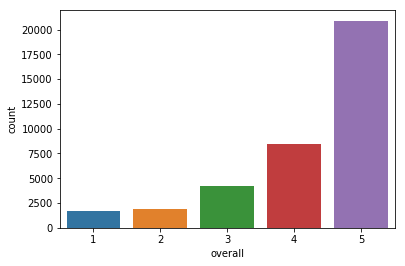

In [0]:
sns.countplot(dataset['overall'])

#Preprocessing

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
X1=dataset['reviewText'].values
Y1=dataset['overall'].values

In [0]:
X2=dataset2['reviewText'].values
Y2=dataset2['overall'].values

In [0]:
X=np.append(X1.reshape(1,-1),X2.reshape(1,-1))
Y=np.append(Y1.reshape(1,-1),Y2.reshape(1,-1))

In [0]:
tokenizer = Tokenizer(num_words=2500,split=' ')
tokenizer.fit_on_texts(X)

In [0]:
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X)

In [0]:
Y=Y-1
Y = to_categorical(Y)

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8)

#Model

In [0]:
import keras 
from keras.layers import Embedding, LSTM, Bidirectional, Dense, GRU
from keras.models import Sequential

##GRU

In [0]:
model = Sequential()
model.add(Embedding(2500,128,input_length=X.shape[1],dropout=0.2))
model.add(GRU(30, dropout_U=0.2,dropout_W=0.2))
model.add(Dense(5,activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
model.summary()

W0725 13:46:29.297167 140127134537600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0725 13:46:29.340510 140127134537600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0725 13:46:29.346644 140127134537600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0725 13:46:29.580720 140127134537600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0725 13:46:29.587671 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 2440, 128)         320000    
_________________________________________________________________
gru_1 (GRU)                  (None, 30)                14310     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 155       
Total params: 334,465
Trainable params: 334,465
Non-trainable params: 0
_________________________________________________________________


In [0]:
history=model.fit(X_train,Y_train,epochs=10,validation_split=0.2,batch_size=500)

W0725 13:46:33.480176 140127134537600 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 30327 samples, validate on 7582 samples
Epoch 1/10
30327/30327 [==============================] - 235s 8ms/step - loss: 1.2922 - acc: 0.5693 - val_loss: 1.1140 - val_acc: 0.5840
Epoch 2/10
30327/30327 [==============================] - 230s 8ms/step - loss: 1.0800 - acc: 0.5878 - val_loss: 1.0527 - val_acc: 0.5876
Epoch 3/10
30327/30327 [==============================] - 230s 8ms/step - loss: 1.0167 - acc: 0.6000 - val_loss: 1.0111 - val_acc: 0.5942
Epoch 4/10
30327/30327 [==============================] - 258s 9ms/step - loss: 0.9689 - acc: 0.6141 - val_loss: 0.9900 - val_acc: 0.5984
Epoch 5/10
30327/30327 [==============================] - 343s 11ms/step - loss: 0.9265 - acc: 0.6303 - val_loss: 0.9711 - val_acc: 0.6031
Epoch 6/10
30327/30327 [==============================] - 346s 11ms/step - loss: 0.8875 - acc: 0.6451 - val_loss: 0.9599 - val_acc: 0.6037
Epoch 7/10
30327/30327 [==============================] - 342s 11ms/step - loss: 0.8612 - acc: 0.6552 - val_loss: 0.9501 

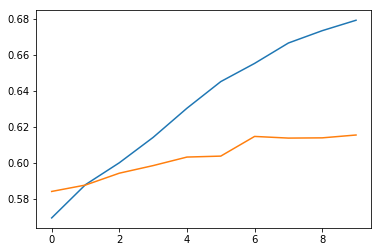

In [0]:

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

In [0]:
model.evaluate(X_test,Y_test)

9478/9478 [==============================] - 615s 65ms/step


[0.9106569707481689, 0.6268200042202996]

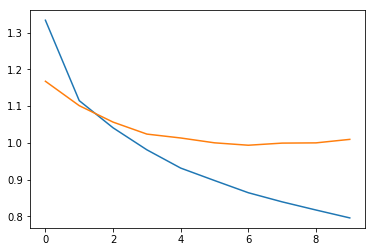

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

##Simple LSTM

In [0]:
model = Sequential()
model.add(Embedding(2500,128,input_length=X.shape[1],dropout=0.2))
model.add(LSTM(60, dropout_U=0.2,dropout_W=0.2))
model.add(Dense(5,activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 2488, 128)         320000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 60)                45360     
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 305       
Total params: 365,665
Trainable params: 365,665
Non-trainable params: 0
_________________________________________________________________


In [0]:
history=model.fit(X_train,Y_train,epochs=10,validation_data=(X_test,Y_test),batch_size=500)

Train on 29700 samples, validate on 7426 samples
Epoch 1/10
29700/29700 [==============================] - 289s 10ms/step - loss: 1.2524 - acc: 0.5550 - val_loss: 1.0968 - val_acc: 0.5602
Epoch 2/10
29700/29700 [==============================] - 287s 10ms/step - loss: 1.0229 - acc: 0.5837 - val_loss: 0.9890 - val_acc: 0.5905
Epoch 3/10
29700/29700 [==============================] - 287s 10ms/step - loss: 0.9498 - acc: 0.6065 - val_loss: 0.9593 - val_acc: 0.5978
Epoch 4/10
29700/29700 [==============================] - 287s 10ms/step - loss: 0.9161 - acc: 0.6249 - val_loss: 0.9391 - val_acc: 0.6128
Epoch 5/10
29700/29700 [==============================] - 287s 10ms/step - loss: 0.8755 - acc: 0.6389 - val_loss: 0.9208 - val_acc: 0.6213
Epoch 6/10
29700/29700 [==============================] - 288s 10ms/step - loss: 0.8453 - acc: 0.6544 - val_loss: 0.9178 - val_acc: 0.6232
Epoch 7/10
29700/29700 [==============================] - 288s 10ms/step - loss: 0.8252 - acc: 0.6618 - val_loss: 0.9

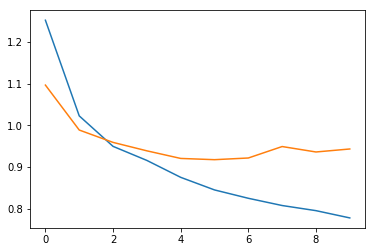

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

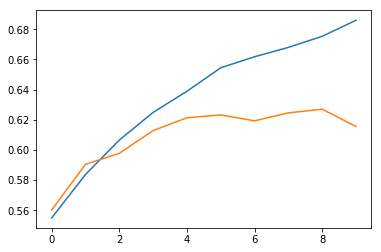

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

##Bidirectional LSTM

In [0]:
model = Sequential()
model.add(Embedding(2500,128,input_length=X.shape[1],dropout=0.2))
model.add(Bidirectional(LSTM(10, dropout_U=0.2,dropout_W=0.2)))
model.add(Dense(5,activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1844, 128)         320000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 20)                11120     
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 105       
Total params: 331,225
Trainable params: 331,225
Non-trainable params: 0
_________________________________________________________________


In [0]:
history=model.fit(X_train,Y_train,epochs=10,batch_size=500)

Epoch 1/10
8208/8208 [==============================] - 136s 17ms/step - loss: 1.4592 - acc: 0.6220
Epoch 2/10
8208/8208 [==============================] - 135s 16ms/step - loss: 1.0851 - acc: 0.6774
Epoch 3/10
8208/8208 [==============================] - 135s 16ms/step - loss: 0.9580 - acc: 0.6774
Epoch 4/10
8208/8208 [==============================] - 136s 17ms/step - loss: 0.9415 - acc: 0.6774
Epoch 5/10
8208/8208 [==============================] - 137s 17ms/step - loss: 0.9318 - acc: 0.6774
Epoch 6/10
8208/8208 [==============================] - 138s 17ms/step - loss: 0.9200 - acc: 0.6774
Epoch 7/10
8208/8208 [==============================] - 136s 17ms/step - loss: 0.9018 - acc: 0.6774
Epoch 8/10
8208/8208 [==============================] - 136s 17ms/step - loss: 0.8796 - acc: 0.6774
Epoch 9/10
8208/8208 [==============================] - 136s 17ms/step - loss: 0.8560 - acc: 0.6774
Epoch 10/10
8208/8208 [==============================] - 136s 17ms/step - loss: 0.8313 - acc: 0.6774

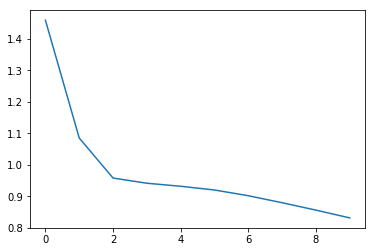

In [0]:
plt.plot(history.history['loss'])